## Import the python Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# read_file = pd.read_excel (r'Muzammil.xlsx')
# read_file.to_csv (r'Gametweet.csv', index = None, header=None)

In [3]:
df = pd.read_csv('Gametweet.csv', header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1,Ekaterina Vinokourova the only daughter of Ru...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,eye do naught want two hear it cyka blyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Cryptic Cyka hmmmmmmmmm women hmmm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Cryptic Cyka that s a really good drawing man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,( ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
290,0,I love thi game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,0,game graphics is eye catching,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,0,Game level is really enjoyable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,0,Good Pixel and very beautiful tool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,0,you are free so come online and play with me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Data Cleaning

In [6]:
# rename the columns.
df.rename(columns = {0:'target', 1 : 'tweets'}, inplace = True)

In [7]:
df.head()

,target,tweets,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1,Ekaterina Vinokourova the only daughter of Ru...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,eye do naught want two hear it cyka blyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Cryptic Cyka hmmmmmmmmm women hmmm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Cryptic Cyka that s a really good drawing man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,( ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df[['tweets', 'target']]

In [9]:
df.head()

,tweets,target
0,Ekaterina Vinokourova the only daughter of Ru...,1
1,eye do naught want two hear it cyka blyat,1
2,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,1
3,Cryptic Cyka hmmmmmmmmm women hmmm,1
4,Cryptic Cyka that s a really good drawing man,1


In [10]:
df.shape

(295, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  295 non-null    object
 1   target  295 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [12]:
df.describe()

,target
count,295.000000
mean,0.111864
std,0.315735
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
df.columns

Index(['tweets', 'target'], dtype='object')

In [14]:
# check missing values
df.isnull().sum()

tweets    0
target    0
dtype: int64

In [15]:
# check duplicate values
df.duplicated().sum()

6

In [16]:
df.shape

(295, 2)

In [17]:
# remove duplicates value
df = df.drop_duplicates()    

In [18]:
# check duplicate values
df.duplicated().sum()

0

In [19]:
df.shape

(289, 2)

In [20]:
df.isnull().sum()

tweets    0
target    0
dtype: int64

# 2. Exploratory Data Analysis

In [21]:
df.head()

,tweets,target
0,Ekaterina Vinokourova the only daughter of Ru...,1
1,eye do naught want two hear it cyka blyat,1
2,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,1
3,Cryptic Cyka hmmmmmmmmm women hmmm,1
4,Cryptic Cyka that s a really good drawing man,1


In [22]:
df['target'].value_counts()

0    256
1     33
Name: target, dtype: int64

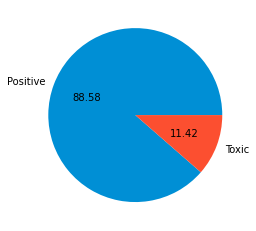

In [23]:
plt.pie(df['target'].value_counts(), labels = ['Positive', 'Toxic'], autopct = '%0.2f')
plt.show()

In [24]:
# calculate the number of characters 
df['num_of_characters'] = df['tweets'].apply(len)

In [25]:
df.head()

,tweets,target,num_of_characters
0,Ekaterina Vinokourova the only daughter of Ru...,1,303
1,eye do naught want two hear it cyka blyat,1,42
2,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,1,221
3,Cryptic Cyka hmmmmmmmmm women hmmm,1,35
4,Cryptic Cyka that s a really good drawing man,1,46


In [26]:
# calculate number of words
df['num_of_words'] = df['tweets'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df.head()

,tweets,target,num_of_characters,num_of_words
0,Ekaterina Vinokourova the only daughter of Ru...,1,303,46
1,eye do naught want two hear it cyka blyat,1,42,9
2,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,1,221,41
3,Cryptic Cyka hmmmmmmmmm women hmmm,1,35,5
4,Cryptic Cyka that s a really good drawing man,1,46,9


In [28]:
# calculate number of sentences
df['num_of_sentences'] = df['tweets'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,tweets,target,num_of_characters,num_of_words,num_of_sentences
0,Ekaterina Vinokourova the only daughter of Ru...,1,303,46,1
1,eye do naught want two hear it cyka blyat,1,42,9,1
2,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,1,221,41,1
3,Cryptic Cyka hmmmmmmmmm women hmmm,1,35,5,1
4,Cryptic Cyka that s a really good drawing man,1,46,9,1


In [30]:
df[['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,289.000000,289.000000,289.0
mean,129.927336,23.501730,1.0
std,80.070487,13.664157,0.0
min,16.000000,4.000000,1.0
25%,62.000000,12.000000,1.0
50%,116.000000,22.000000,1.0
75%,191.000000,33.000000,1.0
max,351.000000,61.000000,1.0


<AxesSubplot:xlabel='num_of_characters', ylabel='Count'>

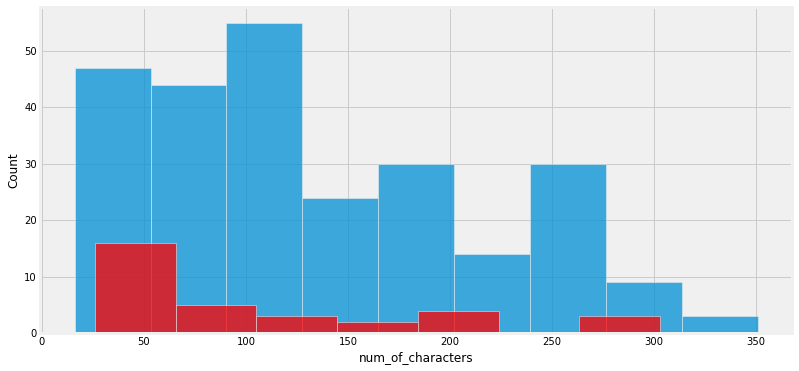

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_characters'])
sns.histplot(df[df['target'] == 1]['num_of_characters'], color='red')

<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

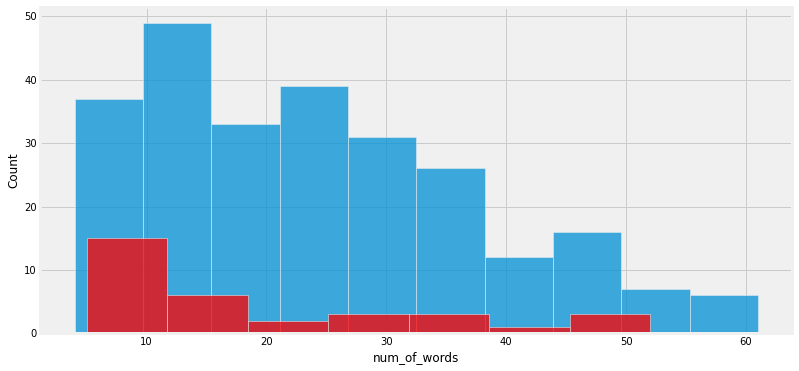

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_words'])
sns.histplot(df[df['target'] == 1]['num_of_words'], color='red')

<AxesSubplot:xlabel='num_of_sentences', ylabel='Count'>

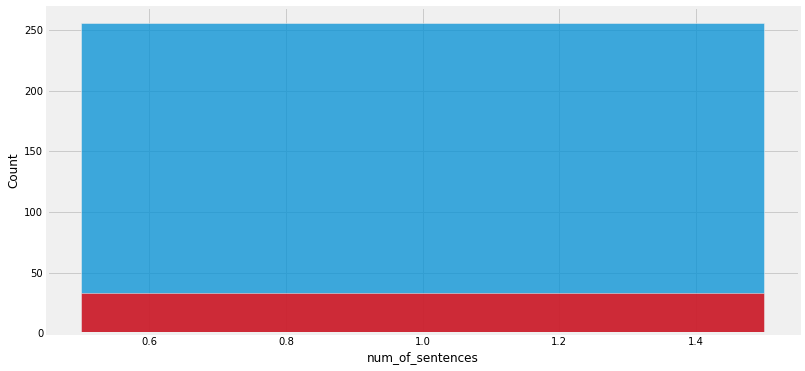

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_sentences'])
sns.histplot(df[df['target'] == 1]['num_of_sentences'], color='red')

C:\Users\Chacha Tech\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Chacha Tech\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


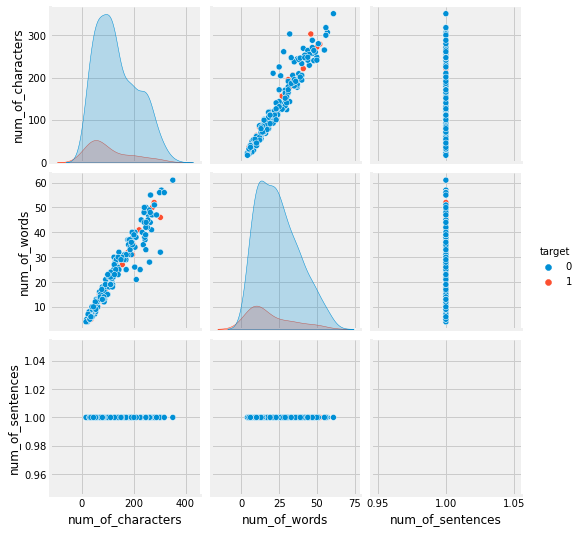

In [34]:
sns.pairplot(df, hue='target')

# 3. Data Preprocessing
## . Lower case
## . Tokenization
## . Removing special characters
## . Removing stopwords and punctuations
## . Stemming / Lemmitization

In [35]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [38]:
def transform_text(text):
    text = text.lower()                  # 1. lower case
    text = nltk.word_tokenize(text)      # 2. Tokenize
   
    y = []
    for i in text:
        if i.isalnum():                  # 3. remove special characters
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: #  4. stopwords and punctuation
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) # 5. Stemming
    
    
    return " ".join(y)

In [39]:
transform_text('Hi How are you') # 1

'hi'

In [40]:
transform_text('Hi How are you') # 2

'hi'

In [41]:
transform_text('Hi How are %% you') # 3

'hi'

In [42]:
transform_text('Did you like my presentation on Data Science?') # 4

'like present data scienc'

In [43]:
transform_text('I loved the machine learning lectures on youtube channel. How about you?') # 5

'love machin learn lectur youtub channel'

In [44]:
df.head()

,tweets,target,num_of_characters,num_of_words,num_of_sentences
0,Ekaterina Vinokourova the only daughter of Ru...,1,303,46,1
1,eye do naught want two hear it cyka blyat,1,42,9,1
2,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,1,221,41,1
3,Cryptic Cyka hmmmmmmmmm women hmmm,1,35,5,1
4,Cryptic Cyka that s a really good drawing man,1,46,9,1


In [45]:
df['transformed_tweets'] = df['tweets'].apply(transform_text)

In [46]:
df.head()

,tweets,target,num_of_characters,num_of_words,num_of_sentences,transformed_tweets
0,Ekaterina Vinokourova the only daughter of Ru...,1,303,46,1,ekaterina vinokourova daughter russian foreign...
1,eye do naught want two hear it cyka blyat,1,42,9,1,eye naught want two hear cyka blyat
2,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,1,221,41,1,ew fkgam gs xw rwapodcast cyka bro supper offe...
3,Cryptic Cyka hmmmmmmmmm women hmmm,1,35,5,1,cryptic cyka hmmmmmmmmm women hmmm
4,Cryptic Cyka that s a really good drawing man,1,46,9,1,cryptic cyka realli good draw man


In [47]:
df[df['target'] == 1]['transformed_tweets']

0     ekaterina vinokourova daughter russian foreign...
1                   eye naught want two hear cyka blyat
2     ew fkgam gs xw rwapodcast cyka bro supper offe...
3                    cryptic cyka hmmmmmmmmm women hmmm
4                     cryptic cyka realli good draw man
5                                cryptic cyka know deal
6     teacher didnt wipe sinc friday fridaynightfunk...
7                                 aregularnam wait mean
8                        thing id let http co gnzyv tcq
9                                   cryptic cyka god lt
10                                    yepyep cyka blyat
11    nigellovesy soooo overr fuck noob game follow ...
12    namastekikii liter mean bitch idiomat use stan...
13                   cykaart niceee congrat cyka deserv
14    tagaan kog chanc mag learn ug new languag pick...
15    defenceu sad pathet putin need help china merc...
16                       taliaa novaa cyka shut fuck nm
17    mfa russia mfa ukrain rusembukrain osc rf 

In [48]:
df[df['target'] == 0]['transformed_tweets']

33        144 therealmurban lunaoi vn anoth whitoid lmao
34     145 marku redmenac lunaoi vn funni fanbas priv...
35     146 srf j leav xtreme game http co ytzdli ii r...
36     147 srf j leav xtreme game replac old eleven l...
37     148 dpc cn pwrd dota underway betnow http co b...
                             ...                        
290                                        love thi game
291                               game graphic eye catch
292                              game level realli enjoy
293                               good pixel beauti tool
294                                 free come onlin play
Name: transformed_tweets, Length: 256, dtype: object

In [49]:
# create a function to get subjectivity.
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

In [50]:
# create a function to get polarity.
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [51]:
f1 = "Not awesome"
f2 = "I love this food .Awesome"

blob1 = TextBlob(f1) 
blob2 = TextBlob(f2) 

print(blob1.sentiment)
print(blob2.sentiment)

Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=0.6)


In [52]:
# # create two new columns.
df['subjectivity'] = df['transformed_tweets'].apply(getSubjectivity)
df['polarity'] = df['transformed_tweets'].apply(getPolarity)

In [53]:
df.head()

,tweets,target,num_of_characters,num_of_words,num_of_sentences,transformed_tweets,subjectivity,polarity
0,Ekaterina Vinokourova the only daughter of Ru...,1,303,46,1,ekaterina vinokourova daughter russian foreign...,0.056250,-0.05625
1,eye do naught want two hear it cyka blyat,1,42,9,1,eye naught want two hear cyka blyat,0.000000,0.00000
2,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,1,221,41,1,ew fkgam gs xw rwapodcast cyka bro supper offe...,0.523254,0.16881
3,Cryptic Cyka hmmmmmmmmm women hmmm,1,35,5,1,cryptic cyka hmmmmmmmmm women hmmm,0.000000,0.00000
4,Cryptic Cyka that s a really good drawing man,1,46,9,1,cryptic cyka realli good draw man,0.600000,0.70000


In [54]:
# create a function to compute the negative , neutral and positive tweet analysis.
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [55]:
# create a new column for tweet analysis.
df['analysis'] = df['polarity'].apply(getAnalysis)
df.head(10)

,tweets,target,num_of_characters,num_of_words,num_of_sentences,transformed_tweets,subjectivity,polarity,analysis
0,Ekaterina Vinokourova the only daughter of Ru...,1,303,46,1,ekaterina vinokourova daughter russian foreign...,0.056250,-0.05625,negative
1,eye do naught want two hear it cyka blyat,1,42,9,1,eye naught want two hear cyka blyat,0.000000,0.00000,neutral
2,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,1,221,41,1,ew fkgam gs xw rwapodcast cyka bro supper offe...,0.523254,0.16881,positive
3,Cryptic Cyka hmmmmmmmmm women hmmm,1,35,5,1,cryptic cyka hmmmmmmmmm women hmmm,0.000000,0.00000,neutral
4,Cryptic Cyka that s a really good drawing man,1,46,9,1,cryptic cyka realli good draw man,0.600000,0.70000,positive
5,Cryptic Cyka they knows her deal,1,33,6,1,cryptic cyka know deal,0.000000,0.00000,neutral
6,Teacher didnt wipe her off since friday frida...,1,82,12,1,teacher didnt wipe sinc friday fridaynightfunk...,0.000000,0.00000,neutral
7,Aregularname Wait what does that mean,1,39,6,1,aregularnam wait mean,0.687500,-0.31250,negative
8,The things id let him do https t co gnZYv ...,1,50,11,1,thing id let http co gnzyv tcq,0.000000,0.00000,neutral
9,Cryptic Cyka on god lt,1,26,5,1,cryptic cyka god lt,0.000000,0.00000,neutral


In [56]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_tweets'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
spam_corpus

['ekaterina',
 'vinokourova',
 'daughter',
 'russian',
 'foreign',
 'minist',
 'sergei',
 'lavrov',
 'spent',
 'year',
 'u',
 'studi',
 'polit',
 'scienc',
 'columbia',
 'univers',
 'econom',
 'london',
 'school',
 'econom',
 'cyka',
 'go',
 'go',
 'back',
 'motherfuckingruissia',
 'http',
 'co',
 'znkcrdqazz',
 'eye',
 'naught',
 'want',
 'two',
 'hear',
 'cyka',
 'blyat',
 'ew',
 'fkgam',
 'gs',
 'xw',
 'rwapodcast',
 'cyka',
 'bro',
 'supper',
 'offens',
 'tell',
 'also',
 'call',
 'bori',
 'channel',
 'ye',
 'dab',
 'hard',
 'russian',
 'bro',
 'yeah',
 'sure',
 'also',
 'dub',
 'right',
 'true',
 'mememan',
 'cryptic',
 'cyka',
 'hmmmmmmmmm',
 'women',
 'hmmm',
 'cryptic',
 'cyka',
 'realli',
 'good',
 'draw',
 'man',
 'cryptic',
 'cyka',
 'know',
 'deal',
 'teacher',
 'didnt',
 'wipe',
 'sinc',
 'friday',
 'fridaynightfunkin',
 'http',
 'co',
 'eorhjtxhsi',
 'aregularnam',
 'wait',
 'mean',
 'thing',
 'id',
 'let',
 'http',
 'co',
 'gnzyv',
 'tcq',
 'cryptic',
 'cyka',
 'god',
 '

In [58]:
from collections import Counter
Counter(spam_corpus)

Counter({'ekaterina': 1,
         'vinokourova': 1,
         'daughter': 1,
         'russian': 7,
         'foreign': 1,
         'minist': 1,
         'sergei': 1,
         'lavrov': 1,
         'spent': 1,
         'year': 2,
         'u': 1,
         'studi': 1,
         'polit': 1,
         'scienc': 1,
         'columbia': 1,
         'univers': 1,
         'econom': 2,
         'london': 1,
         'school': 1,
         'cyka': 31,
         'go': 4,
         'back': 1,
         'motherfuckingruissia': 1,
         'http': 5,
         'co': 5,
         'znkcrdqazz': 1,
         'eye': 1,
         'naught': 1,
         'want': 1,
         'two': 1,
         'hear': 1,
         'blyat': 15,
         'ew': 1,
         'fkgam': 1,
         'gs': 1,
         'xw': 1,
         'rwapodcast': 1,
         'bro': 2,
         'supper': 1,
         'offens': 1,
         'tell': 1,
         'also': 2,
         'call': 1,
         'bori': 1,
         'channel': 1,
         'ye': 1,
         'd

In [59]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,cyka,31
1,blyat,15
2,russian,7
3,fuck,6
4,http,5
5,co,5
6,go,4
7,cryptic,4
8,mean,3
9,game,3


C:\Users\Chacha Tech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


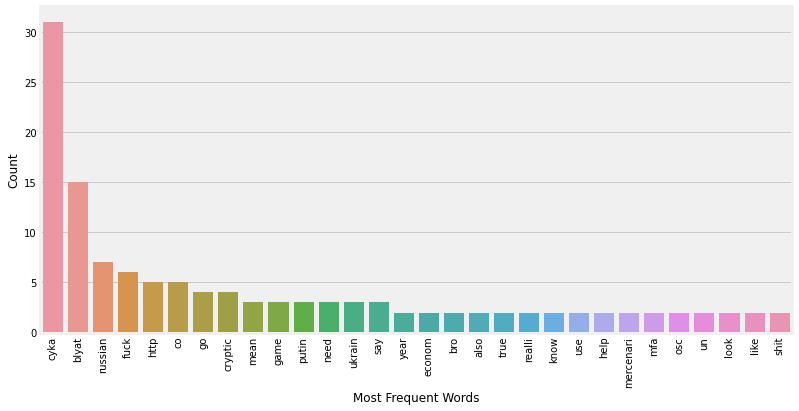

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xlabel('Most Frequent Words')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

In [61]:
sentences = df['transformed_tweets'].tolist()

In [62]:
len(sentences)

289

In [63]:
sentences_as_one_string = " ".join(sentences)

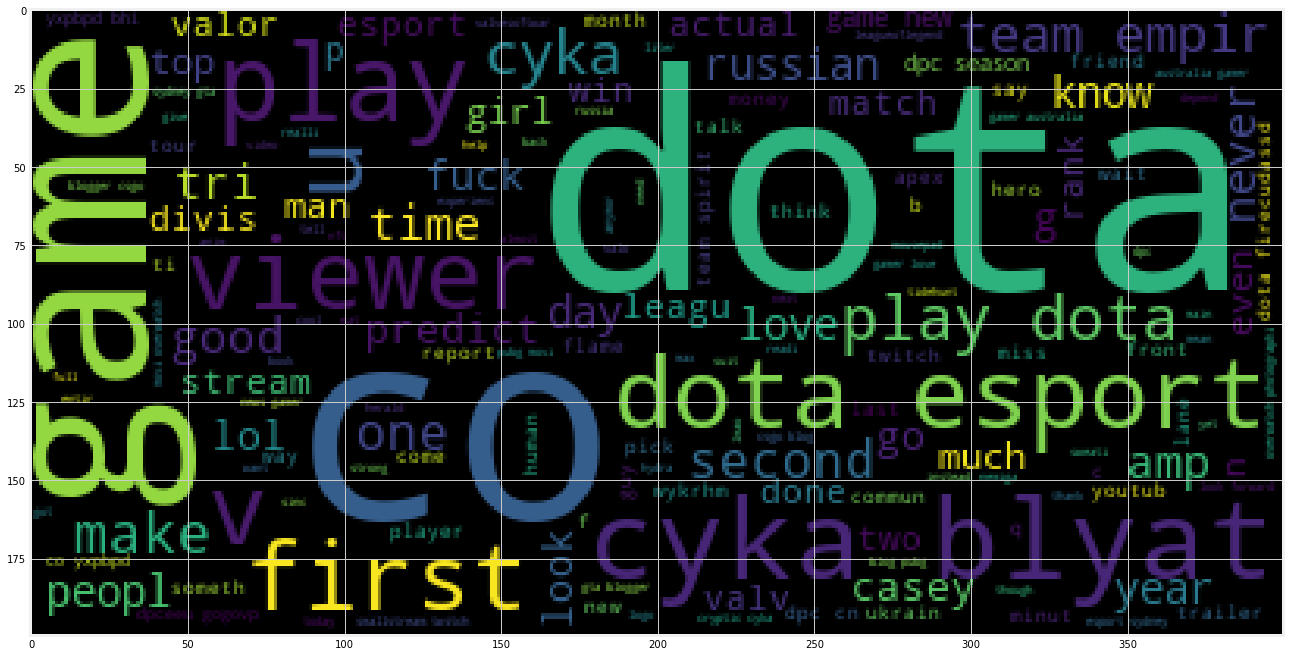

In [64]:
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

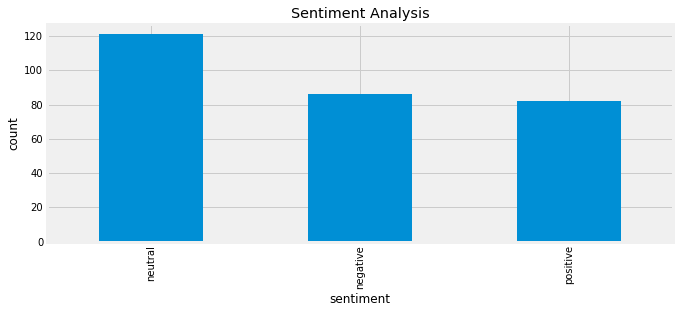

In [65]:
# visualize the value counts.
plt.figure(figsize=(10,4))
df['analysis'].value_counts().plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('Sentiment Analysis')
plt.show()

In [66]:
df['new_target'] = df['transformed_tweets'].apply(lambda x: 1 if 'cyka' in x or 'blyat' in x or 'fuck' in x else 0)

In [67]:
df.head()

,tweets,target,num_of_characters,num_of_words,num_of_sentences,transformed_tweets,subjectivity,polarity,analysis,new_target
0,Ekaterina Vinokourova the only daughter of Ru...,1,303,46,1,ekaterina vinokourova daughter russian foreign...,0.056250,-0.05625,negative,1
1,eye do naught want two hear it cyka blyat,1,42,9,1,eye naught want two hear cyka blyat,0.000000,0.00000,neutral,1
2,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,1,221,41,1,ew fkgam gs xw rwapodcast cyka bro supper offe...,0.523254,0.16881,positive,1
3,Cryptic Cyka hmmmmmmmmm women hmmm,1,35,5,1,cryptic cyka hmmmmmmmmm women hmmm,0.000000,0.00000,neutral,1
4,Cryptic Cyka that s a really good drawing man,1,46,9,1,cryptic cyka realli good draw man,0.600000,0.70000,positive,1


In [68]:
df.tail()

,tweets,target,num_of_characters,num_of_words,num_of_sentences,transformed_tweets,subjectivity,polarity,analysis,new_target
290,I love thi game,0,16,4,1,love thi game,0.50,0.05,positive,0
291,game graphics is eye catching,0,30,5,1,game graphic eye catch,0.40,-0.20,negative,0
292,Game level is really enjoyable,0,31,5,1,game level realli enjoy,0.45,0.00,neutral,0
293,Good Pixel and very beautiful tool,0,35,6,1,good pixel beauti tool,0.60,0.70,positive,0
294,you are free so come online and play with me,0,45,10,1,free come onlin play,0.80,0.40,positive,0


In [69]:
df['new_target'].value_counts()

0    243
1     46
Name: new_target, dtype: int64

In [70]:
df['cyka'] = df['transformed_tweets'].apply(lambda x: 1 if 'cyka' in x else 0)

In [71]:
df['blyat'] = df['transformed_tweets'].apply(lambda x: 1 if 'blyat' in x else 0)

In [72]:
df['fuck'] = df['transformed_tweets'].apply(lambda x: 1 if 'fuck' in x else 0)

In [73]:
df['cyka'].value_counts()

0    245
1     44
Name: cyka, dtype: int64

In [74]:
df['blyat'].value_counts()

0    264
1     25
Name: blyat, dtype: int64

In [75]:
df['fuck'].value_counts()

0    280
1      9
Name: fuck, dtype: int64

## 4. Model Building

In [76]:
# naive based machine learning is best model for textual data.
 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [77]:
X = cv.fit_transform(df['transformed_tweets']).toarray()

In [78]:
X

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
X.shape

(289, 1531)

In [80]:
y = df['new_target'].values

In [81]:
y.shape

(289,)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [84]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [85]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [86]:
# # imbalanced data me accuracy matter zyada nh krta lekin precision score zyada se zyada ho.

In [87]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

In [88]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred1))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred1))
print('Precision Score : ', precision_score(y_test, y_pred1))

Accuracy Score :  0.9310344827586207
Confusion Matrix:  [[46  3]
 [ 1  8]]
Precision Score :  0.7272727272727273


In [89]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

In [90]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred2))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred2))
print('Precision Score : ', precision_score(y_test, y_pred2))

Accuracy Score :  0.896551724137931
Confusion Matrix:  [[43  6]
 [ 0  9]]
Precision Score :  0.6


In [91]:
# TFidf vectorizer

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [93]:
X_tfidf = tfidf.fit_transform(df['transformed_tweets']).toarray()

In [94]:
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.19876558, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [95]:
X_tfidf.shape

(289, 1531)

In [96]:
y.shape

(289,)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 2)

In [98]:
gnb_tfidf = GaussianNB()
mnb_tfidf = MultinomialNB()

In [99]:
gnb_tfidf.fit(X_train, y_train)
y_pred4 = gnb_tfidf.predict(X_test)

In [100]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred4))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred4))
print('Precision Score : ', precision_score(y_test, y_pred4))

Accuracy Score :  0.896551724137931
Confusion Matrix:  [[46  3]
 [ 3  6]]
Precision Score :  0.6666666666666666


In [101]:
mnb_tfidf.fit(X_train, y_train)
y_pred5 = mnb_tfidf.predict(X_test)

In [102]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred5))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred5))
print('Precision Score : ', precision_score(y_test, y_pred5))

Accuracy Score :  0.8793103448275862
Confusion Matrix:  [[49  0]
 [ 7  2]]
Precision Score :  1.0


In [103]:
bnb_tfidf = BernoulliNB()

In [104]:
bnb_tfidf.fit(X_train, y_train)
y_pred6 = bnb_tfidf.predict(X_test)

In [105]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred6))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred6))
print('Precision Score : ', precision_score(y_test, y_pred6))

Accuracy Score :  0.8275862068965517
Confusion Matrix:  [[48  1]
 [ 9  0]]
Precision Score :  0.0


In [106]:
# let's compare other models one by one

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [108]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc  = BaggingClassifier(n_estimators = 50, random_state = 2)
gbc = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [109]:
clfs = {
    'SVC' : svc,
    'KNC' : knc,
    'MNB' : mnb,
    'DTC' : dtc,
    'LRC' : lrc,
    'RFC' : rfc,
    'ABC' : abc,
    'BC'  : bc,
    'GBC' : gbc,
    'XGB' : xgb
}

In [110]:
def train_test_classifier(clf, X_train, y_train,  X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [111]:
train_test_classifier(svc, X_train, y_train, X_test, y_test)

(0.9827586206896551, 1.0)

In [112]:
accuracy_scores  = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_test_classifier(clf, X_train, y_train,  X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9827586206896551
Precision -  1.0
For  KNC
Accuracy -  1.0
Precision -  1.0
For  MNB
Accuracy -  0.8793103448275862
Precision -  1.0
For  DTC
Accuracy -  1.0
Precision -  1.0
For  LRC
Accuracy -  1.0
Precision -  1.0
For  RFC
Accuracy -  0.9827586206896551
Precision -  1.0
For  ABC
Accuracy -  1.0
Precision -  1.0
For  BC
Accuracy -  1.0
Precision -  1.0
For  GBC
Accuracy -  1.0
Precision -  1.0


C:\Users\Chacha Tech\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  XGB
Accuracy -  1.0
Precision -  1.0


In [113]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.982759,1.0
1,KNC,1.000000,1.0
2,MNB,0.879310,1.0
3,DTC,1.000000,1.0
4,LRC,1.000000,1.0
5,RFC,0.982759,1.0
6,ABC,1.000000,1.0
7,BC,1.000000,1.0
8,GBC,1.000000,1.0
9,XGB,1.000000,1.0


In [114]:
performance_df_sv_acc = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df_sv_acc

,Algorithm,Accuracy,Precision
1,KNC,1.000000,1.0
3,DTC,1.000000,1.0
4,LRC,1.000000,1.0
6,ABC,1.000000,1.0
7,BC,1.000000,1.0
8,GBC,1.000000,1.0
9,XGB,1.000000,1.0
0,SVC,0.982759,1.0
5,RFC,0.982759,1.0
2,MNB,0.879310,1.0


In [115]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [116]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.982759,1.0
1,KNC,1.000000,1.0
2,MNB,0.879310,1.0
3,DTC,1.000000,1.0
4,LRC,1.000000,1.0
5,RFC,0.982759,1.0
6,ABC,1.000000,1.0
7,BC,1.000000,1.0
8,GBC,1.000000,1.0
9,XGB,1.000000,1.0


In [117]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [118]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.982759
1,KNC,Accuracy,1.000000
2,MNB,Accuracy,0.879310
3,DTC,Accuracy,1.000000
4,LRC,Accuracy,1.000000
5,RFC,Accuracy,0.982759
6,ABC,Accuracy,1.000000
7,BC,Accuracy,1.000000
8,GBC,Accuracy,1.000000
9,XGB,Accuracy,1.000000


<Figure size 1440x576 with 0 Axes>

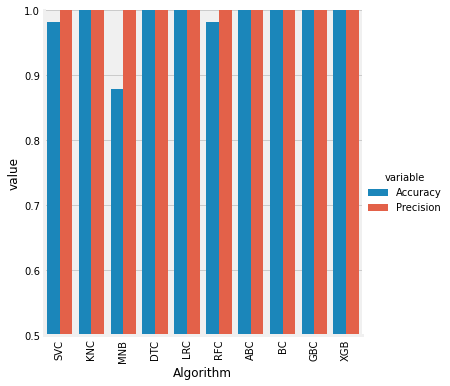

In [119]:
plt.figure(figsize = (20, 8))
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [120]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [121]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [122]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [123]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 1.0
Precision 1.0


In [124]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [125]:
from sklearn.ensemble import StackingClassifier

In [126]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [127]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9827586206896551
Precision 0.9


In [128]:
df.head(10)

,tweets,target,num_of_characters,num_of_words,num_of_sentences,transformed_tweets,subjectivity,polarity,analysis,new_target,cyka,blyat,fuck
0,Ekaterina Vinokourova the only daughter of Ru...,1,303,46,1,ekaterina vinokourova daughter russian foreign...,0.056250,-0.05625,negative,1,1,0,1
1,eye do naught want two hear it cyka blyat,1,42,9,1,eye naught want two hear cyka blyat,0.000000,0.00000,neutral,1,1,1,0
2,eW fkgAM GS xW RWApodcast Cyka Bro that s ...,1,221,41,1,ew fkgam gs xw rwapodcast cyka bro supper offe...,0.523254,0.16881,positive,1,1,0,0
3,Cryptic Cyka hmmmmmmmmm women hmmm,1,35,5,1,cryptic cyka hmmmmmmmmm women hmmm,0.000000,0.00000,neutral,1,1,0,0
4,Cryptic Cyka that s a really good drawing man,1,46,9,1,cryptic cyka realli good draw man,0.600000,0.70000,positive,1,1,0,0
5,Cryptic Cyka they knows her deal,1,33,6,1,cryptic cyka know deal,0.000000,0.00000,neutral,1,1,0,0
6,Teacher didnt wipe her off since friday frida...,1,82,12,1,teacher didnt wipe sinc friday fridaynightfunk...,0.000000,0.00000,neutral,0,0,0,0
7,Aregularname Wait what does that mean,1,39,6,1,aregularnam wait mean,0.687500,-0.31250,negative,0,0,0,0
8,The things id let him do https t co gnZYv ...,1,50,11,1,thing id let http co gnzyv tcq,0.000000,0.00000,neutral,0,0,0,0
9,Cryptic Cyka on god lt,1,26,5,1,cryptic cyka god lt,0.000000,0.00000,neutral,1,1,0,0


In [159]:
tweet = transform_text('eye cyka fuck do naught want two hear it ')

In [160]:
vector_input = tfidf.transform([tweet])

In [161]:
result = mnb_tfidf.predict(vector_input)[0]

In [162]:
result

1

In [163]:
def showresult(result):
    if result == 1:
        print('Toxic Tweet')
    else:
        print('Not Toxic Tweet')

In [164]:
showresult(result)

Toxic Tweet
